<a href="https://colab.research.google.com/github/andresvillamayor/RepositorioPY/blob/master/presentacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



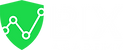



---



#Andrés Villamayor#
*Data Engineer en BIX Paraguay*

# **Que es Google Colab.**

*Es un producto de Google Research. Permite a cualquier usuario escribir y ejecutar código arbitrario de Python en el navegador. Es especialmente adecuado para tareas de aprendizaje automático, análisis de datos y educación.*

- Sin configuración requerida
- Acceso gratuito a GPU
- Facilidad para compartir

Muestra del Ecosistema

- https://jamboard.google.com

- https://datastudio.google.com/navigation/reporting

#**INICIO**

1- Programacion en Python 

2- Para programacion compartida 

3- Para preparacion de datos 

4- Uso de librerias para manejo de datos (Machine Learning) 

5- Levantar Planillas 

6- Guardar en Planillas 


# **Como uso para mantener mi trabajo en la Nube**

1- Conectandose al GitHub

2- Conectandose al Drive (google) 

3- Poder Guardar en el Propio Google Colab



---



# Que significa la extension .*IPYNB*

Las Siglas IPYNB ( Interactive Python Notebook) viene de Jupyter Notebook 

[nbviewer](https://nbviewer.org/)



---



#Python#

**Ejemplos**

- Comentarios 

- Programas

In [2]:
#  se respeta la identacion 
numeros = (1,2,3,4,5,6,7,8,9,10)
for i in numeros:
   print (i)  

1
2
3
4
5
6
7
8
9
10


In [1]:
''' Se puede imprimir igual '''
print("Hola BIXERS")

Hola BIXERS




---



# Preparación de Datos 

1- Conexion a fuente de datos (Drive)

Importar las liberias 

1- drive

2- pandas

In [3]:
from  google.colab import drive
import pandas as pd

In [4]:
drive.mount("/content/drive")

Mounted at /content/drive




---



Creando un DataFrame con Pandas

In [5]:
data = pd.read_csv("/content/drive/My Drive/DatosPruebaBix/creditos.csv", sep = "," , engine="python")

Usar la funcion Head ( por defecto trae los primeros 5 registros) 

In [6]:
data.head()

,id,fechaHora,nacionalidad,nacimiento,sexo,est_civil,ocup_cargo,cliente_nuevo_o_recurrente,prestamo_renovacion_paralelo,monto_solicitado,plazo_solicitado,forma_de_pago,calificacion_cliente,cant_prestamos_vigentes,cant_cuotas_prest_vigente1,cant_cuotas_prest_vigente2,cant_cuotas_pagas_prest_vigente1,cant_cuotas_pagas_prest_vigente2,valor_cuota,saldo_actual_deuda_total,ingreso_neto_mensual,ingreso_bruto_mensual,dias_peor_mora_actual,tiene_visa_classic,tiene_visa_gold,tiene_mc_gold,tiene_fc,tiene_ips,tiene_mc_classic,respuesta_max_limite_prestable,respuesta_max_comp_mensual_ap,respuesta_iconf_faja_score,respuesta_iconf_salario_minimo,respuesta_iconf_cons_cant_u3m,respuesta_iconf_cons_cant_u36m,respuesta_iconf_qui_cant_abiertas,respuesta_iconf_conv_cant_abiertas,respuesta_iconf_dem_cant_abiertas,respuesta_iconf_rem_cant_abiertas,respuesta_iconf_dem_cant_u12m,...,respuesta_iconf_mor_cant_abiertas_ccredito,respuesta_iconf_mor_cant_abiertas_comercio,respuesta_iconf_mor_cant_abiertas_sf,respuesta_iconf_mor_cant_abiertas_otros,respuesta_iconf_morc30_cant_abiertas,respuesta_iconf_gs_por_dol,respuesta_iconf_mor_saldo_abiertas_dol,respuesta_iconf_mor_saldo_abiertas_otros_gs,respuesta_iconf_mor_saldo_abiertas_telco_gs,respuesta_iconf_mor_saldo_abiertas_spub_dol,respuesta_iconf_mor_saldo_abiertas_sf_dol,respuesta_iconf_mor_saldo_abiertas_ccredito_dol,respuesta_iconf_mor_saldo_abiertas_comercio_dol,respuesta_iconf_mor_saldo_abiertas_cable_dol,respuesta_iconf_mor_saldo_abiertas_comercio_gs,respuesta_iconf_mor_saldo_abiertas_gs,respuesta_iconf_mor_saldo_abiertas_telco_dol,respuesta_iconf_mor_saldo_abiertas_sf_gs,respuesta_iconf_mor_saldo_abiertas_otros_dol,respuesta_iconf_mor_saldo_abiertas_spub_gs,respuesta_iconf_mor_saldo_abiertas_cable_gs,respuesta_iconf_mor_saldo_abiertas_ccredito_gs,respuesta_iconf_es_socio_accionista_gran_cont,respuesta_iconf_es_socio_accionista_no_gran_cont,respuesta_iconf_adefi_max_dias_atraso,numeroCuotaDefault,totalCuotas,cantCuotasPend,cantCuotasEnDefault,montoDesembolsado,capital,interes,interesPagado,vigente,saldo,saldoInteresGS,ventaCartera,importeVentaCartera,tipoCartera,resultadoFinal
0,1,2016-03-23 16:57:50.0000000,PY,1984-01-28 00:00:00.0000000,M,S,EMPLEADO,R,3,1500000,8,3,1,0,0,0,0,0,263000,1500000,2500000,2500000,0,NO,NO,NO,NO,1,NO,7000000.0,1200000.0,G,1824055,2,10,0,0,0,0,0,...,0,0,0,0,0,3970,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,8,8,0,0,1500000.0,1852566.0,250645.0,250645.0,NO,0.0,0.0,0,0.0,NaN,BIEN
1,2,2016-03-28 15:35:31.0000000,PY,1966-11-13 00:00:00.0000000,F,S,EMPLEADO,R,2,9969326,37,1,1,1,30,0,23,0,563000,13582044,2500000,3800000,0,NO,NO,NO,NO,1,NO,7000000.0,1200000.0,J,1824055,3,21,0,0,0,0,0,...,0,0,0,0,0,3970,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,36,21,14,9000000.0,11806177.0,7237203.0,4657926.0,SI,8290750.0,2817630.0,0,0.0,NORMAL,BIEN
2,3,2016-03-16 12:35:42.0000000,PY,1963-01-31 00:00:00.0000000,M,S,EMPLEADO,R,2,-2369825,0,3,1,1,12,0,8,0,634500,0,4500000,4500000,0,NO,NO,NO,NO,1,NO,7000000.0,2250000.0,F,1824055,2,23,0,0,0,0,0,...,0,0,0,0,0,3970,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,15,15,0,0,7000000.0,8183185.0,2041828.0,3045159.0,NO,0.0,0.0,0,0.0,NORMAL,BIEN
3,4,2016-03-28 10:05:32.0000000,PY,1962-08-08 00:00:00.0000000,M,C,EMPLEADO,R,2,5000000,24,3,1,1,18,0,12,0,369500,6440923,1850000,1850000,0,NO,NO,NO,NO,1,NO,5550000.0,832500.0,G,1824055,3,23,0,0,0,0,0,...,0,0,0,0,0,3970,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,5,24,0,10,5000000.0,6309517.0,2555180.0,3072230.0,NO,0.0,0.0,1,5535856.0,NORMAL,MAL
4,5,2016-03-15 11:34:44.0000000,PY,1977-03-31 00:00:00.0000000,M,S,EMPLEADO,N,3,2000000,12,3,0,0,0,0,0,0,245000,2000000,3000000,3000000,0,NO,NO,NO,NO,1,NO,7000000.0,900000.0,E,1824055,1,12,0,0,0,0,0,...,0,0,0,0,0,3970,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,7,12,0,7,2000000.0,2493847.0,438468.0,670072.0,NO,0.0,0.0,1,912730.0,NaN,MAL


Usar un Count() para saber la cantidad de registros del DataFrame

In [7]:
data['id'].count()

4966



---



Importar Numpy 

Hacer calculo  y  agregar en una nueva columna 

In [8]:
import numpy as np

Calcula  la edad de persona en el DataFrame de Creditos 

In [9]:
# calcular variable edad a partir de fecha de solicitud - fecha de nacimiento
data['fechaHora'] = pd.to_datetime(data['fechaHora'])
data['nacimiento'] = pd.to_datetime(data['nacimiento'])
data['edad'] = ((data['fechaHora']-data['nacimiento'])/np.timedelta64(1,'Y')).astype(int)

In [11]:
data.head(10)

,id,fechaHora,nacionalidad,nacimiento,sexo,est_civil,ocup_cargo,cliente_nuevo_o_recurrente,prestamo_renovacion_paralelo,monto_solicitado,plazo_solicitado,forma_de_pago,calificacion_cliente,cant_prestamos_vigentes,cant_cuotas_prest_vigente1,cant_cuotas_prest_vigente2,cant_cuotas_pagas_prest_vigente1,cant_cuotas_pagas_prest_vigente2,valor_cuota,saldo_actual_deuda_total,ingreso_neto_mensual,ingreso_bruto_mensual,dias_peor_mora_actual,tiene_visa_classic,tiene_visa_gold,tiene_mc_gold,tiene_fc,tiene_ips,tiene_mc_classic,respuesta_max_limite_prestable,respuesta_max_comp_mensual_ap,respuesta_iconf_faja_score,respuesta_iconf_salario_minimo,respuesta_iconf_cons_cant_u3m,respuesta_iconf_cons_cant_u36m,respuesta_iconf_qui_cant_abiertas,respuesta_iconf_conv_cant_abiertas,respuesta_iconf_dem_cant_abiertas,respuesta_iconf_rem_cant_abiertas,respuesta_iconf_dem_cant_u12m,...,respuesta_iconf_mor_cant_abiertas_comercio,respuesta_iconf_mor_cant_abiertas_sf,respuesta_iconf_mor_cant_abiertas_otros,respuesta_iconf_morc30_cant_abiertas,respuesta_iconf_gs_por_dol,respuesta_iconf_mor_saldo_abiertas_dol,respuesta_iconf_mor_saldo_abiertas_otros_gs,respuesta_iconf_mor_saldo_abiertas_telco_gs,respuesta_iconf_mor_saldo_abiertas_spub_dol,respuesta_iconf_mor_saldo_abiertas_sf_dol,respuesta_iconf_mor_saldo_abiertas_ccredito_dol,respuesta_iconf_mor_saldo_abiertas_comercio_dol,respuesta_iconf_mor_saldo_abiertas_cable_dol,respuesta_iconf_mor_saldo_abiertas_comercio_gs,respuesta_iconf_mor_saldo_abiertas_gs,respuesta_iconf_mor_saldo_abiertas_telco_dol,respuesta_iconf_mor_saldo_abiertas_sf_gs,respuesta_iconf_mor_saldo_abiertas_otros_dol,respuesta_iconf_mor_saldo_abiertas_spub_gs,respuesta_iconf_mor_saldo_abiertas_cable_gs,respuesta_iconf_mor_saldo_abiertas_ccredito_gs,respuesta_iconf_es_socio_accionista_gran_cont,respuesta_iconf_es_socio_accionista_no_gran_cont,respuesta_iconf_adefi_max_dias_atraso,numeroCuotaDefault,totalCuotas,cantCuotasPend,cantCuotasEnDefault,montoDesembolsado,capital,interes,interesPagado,vigente,saldo,saldoInteresGS,ventaCartera,importeVentaCartera,tipoCartera,resultadoFinal,edad
0,1,2016-03-23 16:57:50,PY,1984-01-28,M,S,EMPLEADO,R,3,1500000,8,3,1,0,0,0,0,0,263000,1500000,2500000,2500000,0,NO,NO,NO,NO,1,NO,7000000.0,1200000.0,G,1824055,2,10,0,0,0,0,0,...,0,0,0,0,3970,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,8,8,0,0,1500000.0,1852566.0,250645.0,250645.0,NO,0.0,0.0,0,0.0,NaN,BIEN,32
1,2,2016-03-28 15:35:31,PY,1966-11-13,F,S,EMPLEADO,R,2,9969326,37,1,1,1,30,0,23,0,563000,13582044,2500000,3800000,0,NO,NO,NO,NO,1,NO,7000000.0,1200000.0,J,1824055,3,21,0,0,0,0,0,...,0,0,0,0,3970,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,36,21,14,9000000.0,11806177.0,7237203.0,4657926.0,SI,8290750.0,2817630.0,0,0.0,NORMAL,BIEN,49
2,3,2016-03-16 12:35:42,PY,1963-01-31,M,S,EMPLEADO,R,2,-2369825,0,3,1,1,12,0,8,0,634500,0,4500000,4500000,0,NO,NO,NO,NO,1,NO,7000000.0,2250000.0,F,1824055,2,23,0,0,0,0,0,...,0,0,0,0,3970,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,15,15,0,0,7000000.0,8183185.0,2041828.0,3045159.0,NO,0.0,0.0,0,0.0,NORMAL,BIEN,53
3,4,2016-03-28 10:05:32,PY,1962-08-08,M,C,EMPLEADO,R,2,5000000,24,3,1,1,18,0,12,0,369500,6440923,1850000,1850000,0,NO,NO,NO,NO,1,NO,5550000.0,832500.0,G,1824055,3,23,0,0,0,0,0,...,0,0,0,0,3970,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,5,24,0,10,5000000.0,6309517.0,2555180.0,3072230.0,NO,0.0,0.0,1,5535856.0,NORMAL,MAL,53
4,5,2016-03-15 11:34:44,PY,1977-03-31,M,S,EMPLEADO,N,3,2000000,12,3,0,0,0,0,0,0,245000,2000000,3000000,3000000,0,NO,NO,NO,NO,1,NO,7000000.0,900000.0,E,1824055,1,12,0,0,0,0,0,...,0,0,0,0,3970,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,7,12,0,7,2000000.0,2493847.0,438468.0,670072.0,NO,0.0,0.0,1,912730.0,NaN,MAL,38
5,6,2016-03-16 10:16:30,PY,1973-07-04,M,S,EMPLEADO,R,2,7000000,17,3,5,1,24,0,17,0,625500,10575769,2730000,3000000,0,NO,NO,NO,NO,1,SI,0.0,0.0,I,1824055,1,11,0,0,0,0,0,...,0,0,0,0,3970,0,0,206790.0,0,0,0,0,0,0,206790.0,0,0,0,0,0,0.0,0,0,0,17,17,0,0,7000000.0,8283451.0,2344507.0,2344507.0,NO,0.0,0.0,0,0.0



---



MACHINE LEARNING

Clustering o Agrupamiento de datos 

Se Genera un nuevo DataFrame a partir de Feature Selection (Selecciona las columnas que quiero utilizar)

In [12]:
df = data[['edad','cliente_nuevo_o_recurrente','monto_solicitado','tiene_ips',
           'plazo_solicitado','ingreso_neto_mensual','resultadoFinal']]

In [13]:
df.head()

,edad,cliente_nuevo_o_recurrente,monto_solicitado,tiene_ips,plazo_solicitado,ingreso_neto_mensual,resultadoFinal
0,32,R,1500000,1,8,2500000,BIEN
1,49,R,9969326,1,37,2500000,BIEN
2,53,R,-2369825,1,0,4500000,BIEN
3,53,R,5000000,1,24,1850000,MAL
4,38,N,2000000,1,12,3000000,MAL


Usando K-means 

K-means es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. 

In [14]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

Scikit-Learn implementa esta funcionalidad en la clase sklearn.preprocessing.

OneHotEncoder y pandas la implementa en la clase pandas.get_dummies. 

En este ejemplo usamos en Variables Categoricas. 

In [16]:
# One-hot encoding para variables categoricas
x = pd.get_dummies(df)

**Normalizacion de los datos**

- utilizando el min_max_scaler  

*Se transforman los valores en el rango de 1 a 0* 

*En las variable como Bien o Mal(Variables Categoricas) tiene dos valores distintos uno es 1 y otro es 0  por lo tanto el min_max_scaler genera otra columna, al igual que Cliente Recurrente*

*El uso de min_max_scaler da un buen resultado para conjuntos de datos (columnas) pequeños*



In [17]:
# Normalizacion a [0-1]
min_max_scaler = preprocessing.MinMaxScaler()
xNorm = pd.DataFrame(min_max_scaler.fit_transform(x.values))
xNorm.head()

,0,1,2,3,4,5,6,7,8
0,0.213115,0.131923,1.0,0.131148,0.007812,0.0,1.0,1.0,0.0
1,0.491803,0.184803,1.0,0.606557,0.007812,0.0,1.0,1.0,0.0
2,0.557377,0.107761,1.0,0.000000,0.014062,0.0,1.0,1.0,0.0
3,0.557377,0.153776,1.0,0.393443,0.005781,0.0,1.0,0.0,1.0
4,0.311475,0.135045,1.0,0.196721,0.009375,1.0,0.0,0.0,1.0




---



**Utilizando Curva el Elbow**

importamos matplotlib 

In [18]:
import matplotlib.pyplot as plt 

Generamos la curba de Elbow para tener una esquema de un cantidad aproximada de cluster

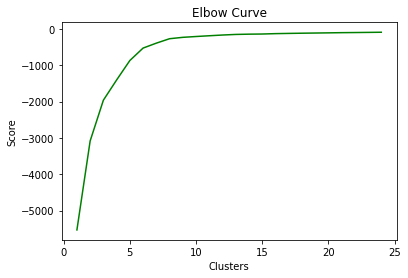

In [19]:
nc = range(1, 25)
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(xNorm).score(xNorm) for i in range(len(kmeans))]
plt.plot(nc, score, color='green') 
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Utilizamos los cluster de la curva de  Elbow, con el uso de la misma semilla con una cantidad de 300 iteraciones 

In [22]:
kmeans = KMeans(n_clusters=10, max_iter=300, random_state=1)
kmeans.fit(xNorm)
print("Score: " + str(kmeans.score(xNorm)))
print(kmeans.labels_)

clusters = pd.DataFrame(min_max_scaler.inverse_transform(kmeans.cluster_centers_), columns=x.columns)
clusters['tiene_ips'] = clusters['tiene_ips'].round()
clusters['cliente_nuevo_o_recurrente_N'] = clusters['cliente_nuevo_o_recurrente_N'].round()
clusters['cliente_nuevo_o_recurrente_R'] = clusters['cliente_nuevo_o_recurrente_R'].round()
clusters['resultadoFinal_BIEN'] = clusters['resultadoFinal_BIEN'].round()
clusters['resultadoFinal_MAL'] = clusters['resultadoFinal_MAL'].round()
clusters

Score: -204.91596897759683
[2 9 9 ... 5 7 2]


,edad,monto_solicitado,tiene_ips,plazo_solicitado,ingreso_neto_mensual,cliente_nuevo_o_recurrente_N,cliente_nuevo_o_recurrente_R,resultadoFinal_BIEN,resultadoFinal_MAL
0,52.207358,5.253843e+06,0.0,18.525084,5.347346e+06,-0.0,1.0,1.0,-0.0
1,36.942928,3.488713e+06,1.0,15.021092,2.753173e+06,1.0,-0.0,1.0,-0.0
2,34.225898,5.127726e+06,1.0,19.098299,2.474957e+06,0.0,1.0,1.0,-0.0
3,31.842407,4.233443e+06,0.0,17.042980,2.965528e+06,1.0,0.0,0.0,1.0
4,39.298077,5.501243e+06,1.0,21.807692,2.502846e+06,-0.0,1.0,0.0,1.0
5,34.513468,4.105350e+06,0.0,14.685185,3.599711e+06,1.0,-0.0,1.0,0.0
6,33.319820,4.134036e+06,1.0,17.977477,2.670215e+06,1.0,0.0,0.0,1.0
7,37.485000,6.082539e+06,0.0,21.395000,2.890973e+06,0.0,1.0,-0.0,1.0
8,30.796680,5.838837e+06,0.0,18.402490,3.268038e+06,-0.0,1.0,1.0,0.0
9,53.031056,5.193764e+06,1.0,19.642857,2.806736e+06,-0.0,1.0,1.0,0.0


Imprimimos los cluster y el la cantidad de registros x cada uno 

In [23]:
xFinal = pd.concat([x,pd.DataFrame(list(kmeans.labels_),columns=['label'])],axis= 1)
print('Cluster 0', xFinal[xFinal['label']==0])
print('Cluster 1', xFinal[xFinal['label']==1])
print('Cluster 2',xFinal[xFinal['label']==2])
print('Cluster 3',xFinal[xFinal['label']==3])
print('Cluster 4',xFinal[xFinal['label']==4])
print('Cluster 5',xFinal[xFinal['label']==5])
print('Cluster 6',xFinal[xFinal['label']==6])
print('Cluster 7',xFinal[xFinal['label']==7])
print('Cluster 8',xFinal[xFinal['label']==8])
print('Cluster 9',xFinal[xFinal['label']==9])

Cluster 0       edad  monto_solicitado  ...  resultadoFinal_MAL  label
52      47           3000000  ...                   0      0
79      51           4000000  ...                   0      0
80      42           2000000  ...                   0      0
104     51          -4170889  ...                   0      0
114     53           4000000  ...                   0      0
...    ...               ...  ...                 ...    ...
4883    45           3000000  ...                   0      0
4920    54           6000000  ...                   0      0
4921    45           2000000  ...                   0      0
4927    51           3000000  ...                   0      0
4936    55           5000000  ...                   0      0

[299 rows x 10 columns]
Cluster 1       edad  monto_solicitado  ...  resultadoFinal_MAL  label
13      26           3000000  ...                   0      1
24      26           2000000  ...                   0      1
30      30           5000000  ...       

Generamos un archivo csv donde especificamos los registros y el cluster al cual pertenece

In [24]:
xFinal.to_csv(r'/content/drive/My Drive/DatosPruebaBix/creditos_clustering.csv', index = False, header=True)